In [1]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import numpy as np
from  sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Project 2B: Stock Market Prediction

In this section, you will be working on predicting stock price. 

A stock or share is financial instrument that represents ownership in a company. The trading price of a stock varies with supply and demand of the market. For example, Apple stock is currently trading around \\$172. It was traded above \\$200 during September last year! Basically, if you are investing in a stock and its price goes up, you can sell the stock to make profit.

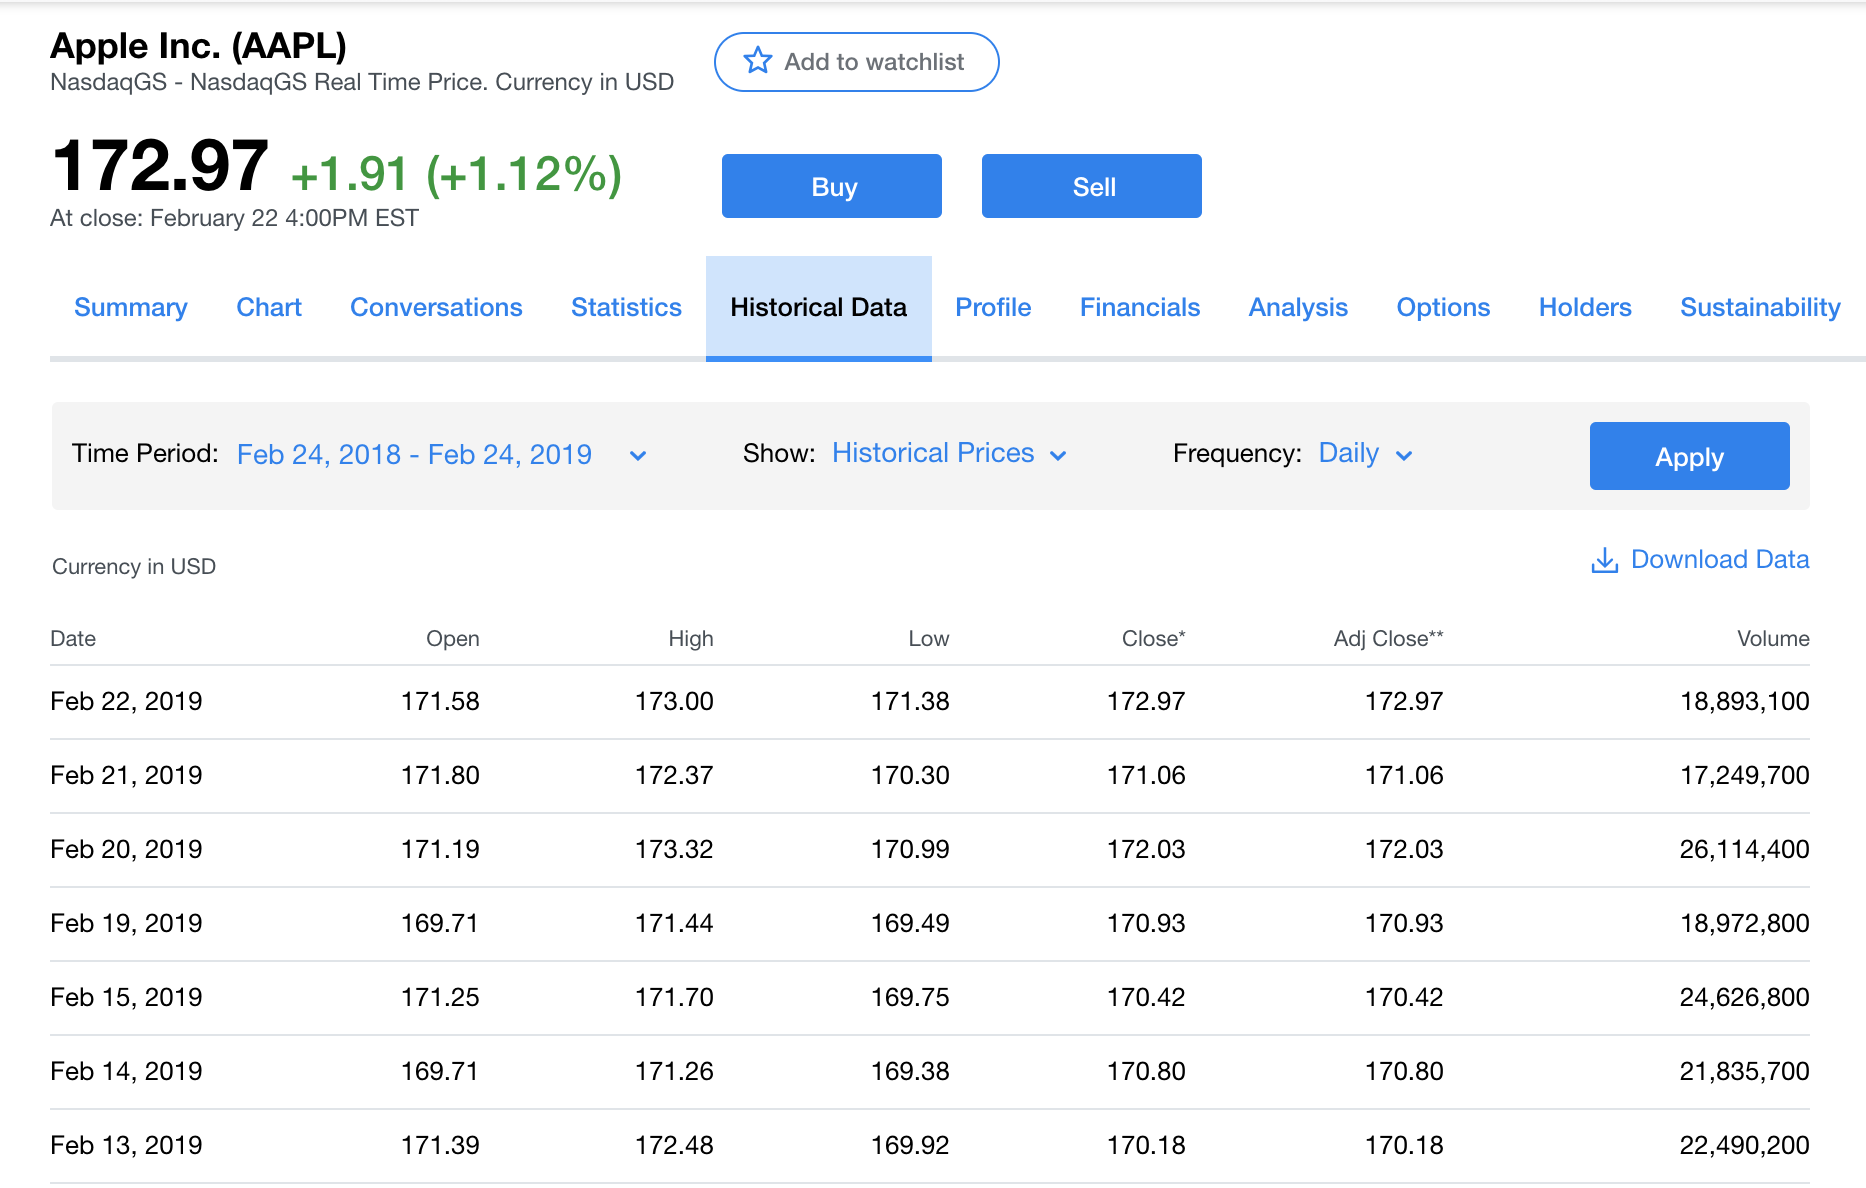

When you look at a stock price of a given day, there are 4 prices that stock traders look at:
1. **Open price** -- the price of the stock when the market opens
1. **Close price** -- the price of the stock when the market closes
1. **High price** -- the highest price of the stock during the trading period
1. **Low price** -- the lowest price of the stock during the trading period

In reality, there are a lot factors affecting the price of a certain stock. However, there are some people who beleive that they can predict the stock price based on the movement of the price itself. They call it "technical analysis" of stock price. 

You are going to create a classifier/predictor that predicts the stock prices of 3 unknown companies. To simplify the problem, you will need to predict if the CLOSE price of the stock will go up or go down based on the observation of the last 8 days.

You are provided with a set of training data with the following columns:
- `D{i}_close` -- close price of day -i
- `D{i}_open` -- open price of day -i
- `D{i}_high` -- high price of day -i
- `D{i}_low` -- low price of day -i
- `Label` -- `True` if price going UP the following day and `False` otherwise

Here is an example:

```
Label,D0_open,D0_close,D0_low,D0_high,D1_open,D1_close,D1_low,D1_high,D2_open,D2_close,D2_low,D2_high ...
True,0.5804,0.5804,0.5804,0.5827,0.5514,0.5514,0.5514,0.5536,0.5291,0.5291,0.5291,0.5313 ...
```

Explanation: In this given day, the close price is \\$0.5804. The close price of the previous trading day was \\$0.5514, and it was \\$0.5291 the day before. It turns out that the close price of the next day is HIGHER than \\$0.5804 (Label = True). You can see the trend here.



<div class="alert alert-block alert-success">
<b>Your Task</b>
You are given 3 set of data: StockA_train.csv, StockB_train.csv and StockC_train.csv. For each data set, the goal is to train a classifier that predicts whether the stock price is going up or down. Your classifier will be tested against a different set of data (hidden from you). 
</div>

#### 1. Load the data into DataFrame

In [182]:
stockA = pd.read_csv("stockA_train.csv")
stockB = pd.read_csv("stockB_train.csv")
stockC = pd.read_csv("stockC_train.csv")


stockA_test = pd.read_csv("StockA_test.csv")
stockB_test = pd.read_csv("StockB_test.csv")
stockC_test = pd.read_csv("StockC_test.csv")


def only_get_test(stock):
    def fix_lable(df):
        for i in range(8):
            if (df.iloc[i+1]['close'] >= df.iloc[i]['close']):
                df.at[i, 'tomorrow']  = "True"
            else:
                df.at[i, 'tomorrow']  = "False"
                
    
                
    def by_day_stock(df):
        #We need the full first row 
        d = ['tomorrow', 'open', 'close', 'low', 'high']
        new_df = pd.DataFrame(columns=d)
        first_row = df.iloc[0]

        for i in range(8):
            data = ["True"] + [first_row[x] for x in range(4*i+1,4*i+1+4)] 
    #         print(data)
            new_df.loc[i] = data
        # The rest of it appends only D0
        df = df.drop(0)
        selected_D0 = df[['Label', 'D0_open', 'D0_close','D0_low', 'D0_high']]
        selected_D0.columns = d
        new_df = new_df.append(selected_D0, sort=False, ignore_index=True)
        new_df.reindex()
        return new_df
    
    new_df= by_day_stock(stock)
    # Fixing label in the prediction 
    fix_lable(new_df)
    # change false to 0 true to 1 
    
    new_df['tomorrow'] = new_df['tomorrow'].apply(lambda row: 1 if row == True else 0)
    #We need only close and open 
    data = new_df[['close', 'open']]
    target = new_df['tomorrow']
    
    
    return data, target
    

def split_funtion(stock):
    def fix_lable(df):
        for i in range(8):
            if (df.iloc[i+1]['close'] >= df.iloc[i]['close']):
                df.at[i, 'tomorrow']  = "True"
            else:
                df.at[i, 'tomorrow']  = "False"

    def by_day_stock(df):
        #We need the full first row 
        d = ['tomorrow', 'open', 'close', 'low', 'high']
        new_df = pd.DataFrame(columns=d)
        first_row = df.iloc[0]

        for i in range(8):
            data = ["True"] + [first_row[x] for x in range(4*i+1,4*i+1+4)] 
    #         print(data)
            new_df.loc[i] = data
        # The rest of it appends only D0
        df = df.drop(0)
        selected_D0 = df[['Label', 'D0_open', 'D0_close','D0_low', 'D0_high']]
        selected_D0.columns = d
        new_df = new_df.append(selected_D0, sort=False, ignore_index=True)
        new_df.reindex()
        return new_df

    new_df= by_day_stock(stock)
    # Fixing label in the prediction 
    fix_lable(new_df)
    # change false to 0 true to 1 
    new_df['tomorrow'] = new_df['tomorrow'].apply(lambda row: 1 if row == True else 0)
    #We need only close and open 
    data = new_df[['close', 'open']]
    target = new_df['tomorrow']
    data, target = shuffle(data, target) # shuffle dataset (which is ordered!)
    #split
    (train_data, test_data, train_target, test_target) = train_test_split(data,
                                                                      target,
                                                                      test_size = 0.2,
                                                                      random_state = 0
                                                                     )
    
    
    return (new_df, train_data, train_target, test_data, test_target)
    
    

(A_raw, A_train_data, A_train_target, A_test_data, A_test_target)  = split_funtion(stockA)    
(B_raw, B_train_data, B_train_target,B_test_data, B_test_target) = split_funtion(stockB)    
(C_raw, C_train_data, C_train_target,C_test_data, C_test_target) = split_funtion(stockC)  



# 0 means that tomorrow's close price goes higher


A_data, A_target = only_get_test(stockA_test)
B_data, B_target = only_get_test(stockB_test)
C_data, c_target = only_get_test(stockC_test)
A_raw.head(20)
    

(6933, 2)


,tomorrow,open,close,low,high
0,0,0.5804,0.5804,0.5804,0.5827
1,0,0.5514,0.5514,0.5514,0.5536
2,0,0.5291,0.5291,0.5291,0.5313
3,0,0.5045,0.5045,0.5045,0.5068
4,0,0.4755,0.4755,0.4755,0.4777
5,0,0.4620,0.4620,0.4620,0.4643
6,0,0.4530,0.4509,0.4509,0.4530
7,0,0.4889,0.4866,0.4866,0.4889
8,1,0.6339,0.6339,0.6339,0.6361
9,0,0.6429,0.6429,0.6429,0.6452


#### 2. Perform EDA

In [143]:
# the dataset is converted ==> 
# Label -> to tomorrow (boolean -> int)
# using only dataset of D0
A_raw.head()
A_raw.info()



A_raw.groupby("tomorrow").describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8667 entries, 0 to 8666
Data columns (total 5 columns):
tomorrow    8667 non-null int64
open        8667 non-null float64
close       8667 non-null float64
low         8667 non-null float64
high        8667 non-null float64
dtypes: float64(4), int64(1)
memory usage: 338.6 KB


tomorrow               0            1
close count  4392.000000  4275.000000
      mean     25.224182    28.513357
      std      46.528667    48.704622
      min       0.205400     0.196400
      25%       1.013200     1.109300
      50%       1.607100     1.803600
      75%      22.117525    30.925750
      max     232.070000   229.280000
high  count  4392.000000  4275.000000
      mean     25.464660    28.801087
      std      46.924173    49.137886
      min       0.207700     0.198600
      25%       1.031250     1.142900
      50%       1.636100     1.839300
      75%      22.676775    31.014300
      max     233.470000   230.000000
low   count  4392.000000  4275.000000
      mean     24.958911    28.235175
      std      46.100280    48.283781
      min       0.205400     0.196400
      25%       0.995400     1.072100
      50%       1.585000     1.776800
      75%      21.576000    30.500700
      max     229.780000   226.630000
open  count  4392.000000  4275.000000
      mean     25.219115    28.534846
      std      46.522921    48.730084
      min       0.205400     0.198600
      25%       1.014825     1.107100
      50%       1.607100     1.803600
      75%      22.027850    30.597850
      max     230.780000   227.950000

#### 3. Feature engineering

In [144]:
# Preprocess the features -- You dont need to use the original features we provided

#### 4. Train classifiers

## K-Nearest  Neighbor Method 

In [145]:
def KNN_FIND_BEST(train_data, train_target, test_data , test_target):
    """ Return K best 
    """
    kVals = range(1,21, 2)
    accuracy_score =[]
    for k in range(1, 21, 2):
        #Building up the model with test values
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(train_data, train_target)
        accuracy_score.append(model.score(test_data, test_target))
    index_max = accuracy_score.index(max(accuracy_score))
    print("Accuracy score is maximum at %f percent \n when k = %d" % (max(accuracy_score), kVals[index_max]))
    return kVals[index_max]
        



In [167]:
print("STOCK A")

k_A = KNN_FIND_BEST(A_train_data, A_train_target, A_test_data, A_test_target)

STOCK A
Accuracy score is maximum at 0.518454 percent 
 when k = 19


In [168]:
print("STOCK B")
print("=============")
k_B = KNN_FIND_BEST(B_train_data, B_train_target, B_test_data, B_test_target)

STOCK B
Accuracy score is maximum at 0.516388 percent 
 when k = 17


In [169]:
print("STOCK C")
print("=============")
k_C = KNN_FIND_BEST(C_train_data, C_train_target, C_test_data, C_test_target)

STOCK C
Accuracy score is maximum at 0.504057 percent 
 when k = 15


# Logistic Regression Method

In [170]:
def LOGISTIC_REGRESSION_MODEL(train_data, train_target, test_data, test_target):
    from sklearn.linear_model import LogisticRegression
    LRmodel = LogisticRegression(C=100000, solver='newton-cg')
    LRmodel.fit(train_data, train_target)
    print(LRmodel.coef_)
    print(LRmodel.intercept_)
    # It simply means given the data train x, what the probability that the close price will go up tomorrow
    # Log(1/ 1-h(x)) = LRmodel.intercept_ + LRmodel.coef_(x)
    print("Train accuracy", LRmodel.score(train_data,train_target))
    print("Test accuracy", LRmodel.score(test_data,test_target))

In [171]:
LOGISTIC_REGRESSION_MODEL(A_train_data, A_train_target, A_test_data, A_test_target)
LOGISTIC_REGRESSION_MODEL(A_train_data, A_train_target, A_data, A_target)

[[-0.08504473  0.0869723 ]]
[-0.07653224]
Train accuracy 0.5240155776720035
Test accuracy 0.5074971164936563
[[-0.08504473  0.0869723 ]]
[-0.07653224]
Train accuracy 0.5240155776720035
Test accuracy 0.5490196078431373


In [172]:
LOGISTIC_REGRESSION_MODEL(B_train_data, B_train_target, B_test_data, B_test_target)

[[-0.20943534  0.21081565]]
[-0.02783555]
Train accuracy 0.5317725752508361
Test accuracy 0.5043478260869565


In [173]:
LOGISTIC_REGRESSION_MODEL(C_train_data, C_train_target, C_test_data, C_test_target)

[[ 0.00188659 -0.00164694]]
[-0.06071001]
Train accuracy 0.5283975659229209
Test accuracy 0.486815415821501


## Perceptron Method

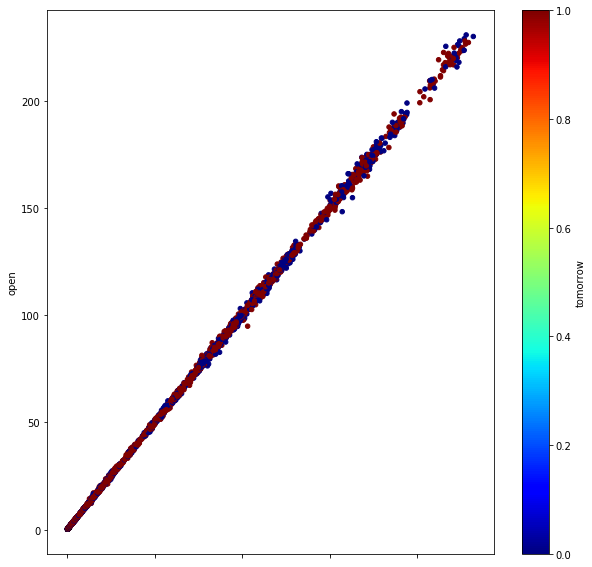

In [174]:
A = A_raw
A.plot(x='close', y='open',kind='scatter',c='tomorrow',colormap='jet', figsize=(10,10))

## Perceptron Rule always works if the data is linearly separable
## This is not 

## Decision Tree And Random Forest

In [175]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X['close'], X['open'], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)
    
    


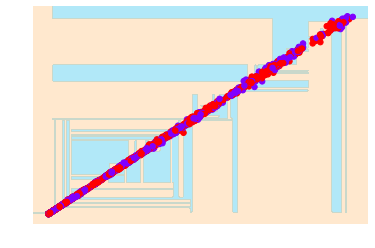

In [155]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(DecisionTreeClassifier(), A_train_data, A_train_target)

## Again data is not linearly seperable, we can't apply decision tree







/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


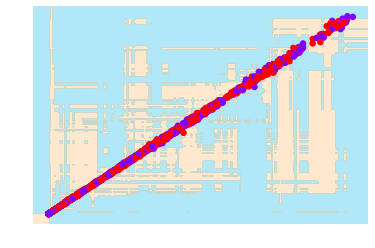

In [176]:
visualize_classifier(RandomForestClassifier(), A_train_data, A_train_target)

## Support Vector Regression (SVR)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


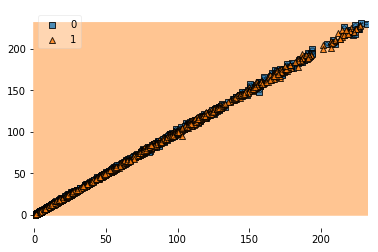

In [177]:
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
clf = svm.SVC()
clf.fit(A_train_data, A_train_target)


plot_decision_regions(X=np.array(A_train_data), 
                      y=np.array(A_train_target),
                      clf=clf, 
                      legend=2)

In [158]:
predictions = clf.predict(A_test_data)
report = classification_report(A_test_target, predictions)
print(report)




              precision    recall  f1-score   support

           0       0.53      0.74      0.62       895
           1       0.52      0.31      0.38       839

   micro avg       0.53      0.53      0.53      1734
   macro avg       0.53      0.52      0.50      1734
weighted avg       0.53      0.53      0.50      1734



#### 5. Compare and evaluate the train classifiers

In [178]:
def REPORT_AND_GRAPH(k_best, train_data, train_labels, test_data, test_labels):
    print("Using K = %d for our final test " % k_best)
    model = KNeighborsClassifier(n_neighbors= k_best)
    model.fit(train_data, train_labels)
    predictions = model.predict(test_data)
    report = classification_report(test_labels, predictions, output_dict=True)
    df = pd.DataFrame(report)
    df.drop(["f1-score", "support"], inplace=True ,axis=0)
    df.drop(["micro avg", "macro avg", "weighted avg"], axis=1, inplace=True)

    df = (df*100)
    df = df.astype(int)
    df
    
    print("Creating confusion metrix")
    conf_mat = confusion_matrix(test_labels, predictions)
    fig, ax = plt.subplots(1,1, figsize=(5,5))
    # skplt.metrics.plot_confusion_matrix(test_labels, predictions, ax=ax[1])
    sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False, ax=ax)
    ax.set_title('Confusion Metrix')
    ax.set_ylabel("Actual")
    ax.set_xlabel("Predicted")
    
# REPORT_AND_GRAPH(k_A, A_train_data, A_train_target, A_test_data, A_test_target)
# REPORT_AND_GRAPH(k_B, B_train_data, B_train_target, B_test_data, B_test_target)
# REPORT_AND_GRAPH(k_C, C_train_data, C_train_target, C_test_data, C_test_target)


    

def PRINT_REPORT(model, train_data, train_target, test_data, test_target):
    model.fit(train_data, train_target)
    predictions = model.predict(test_data)
    print("+=======================================================+")
    print(classification_report(test_target, predictions))
    print("+=======================================================+")

# PRINT_REPORT(KNeighborsClassifier(n_neighbors = k_A), A_train_data, A_train_target, A_test_data, A_test_target) 
# PRINT_REPORT(KNeighborsClassifier(n_neighbors = k_B), B_train_data, B_train_target, B_test_data, B_test_target) 
# PRINT_REPORT(KNeighborsClassifier(n_neighbors = k_C), C_train_data, C_train_target, C_test_data, C_test_target) 


# PRINT_REPORT(KNeighborsClassifier(n_neighbors= k_A), A_train_data, A_train_target, A_data, A_target)
PRINT_REPORT(KNeighborsClassifier(n_neighbors= k_B), B_train_data, B_train_target, B_data, B_target)



+=======================================================+
              precision    recall  f1-score   support

           0       0.59      0.53      0.56       424
           1       0.56      0.61      0.59       412

   micro avg       0.57      0.57      0.57       836
   macro avg       0.57      0.57      0.57       836
weighted avg       0.57      0.57      0.57       836

+=======================================================+


<div class="alert alert-block alert-info">
Best Classifer for Stock A is .... (Type and pameraters)
</div>

In [179]:
from sklearn.model_selection import cross_val_score


# To use K-Fold we need the whole dataset ( combined train and test ) 
# Let this process split the train and test data for you
def K_fold(best_k, data,target):
    # perform 10-fold cross validation
    
    knn = KNeighborsClassifier(n_neighbors=best_k)
    scores = cross_val_score(knn, data , target, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
 

In [181]:
A_data_combined_ = np.vstack((A_train_data, A_test_data))
A_target_combined = np.hstack((A_train_target, A_test_target))
K_fold(k_A, A_data_combined_ , A_target_combined )

# If the std is high, the result is inconsistant.

Accuracy: 0.52 (+/- 0.01)


<div class="alert alert-block alert-info">
Best Classifer for Stock B is .... (Type and pameraters)
</div>

In [180]:
B_data_combined_ = np.vstack((B_train_data, B_test_data))
B_target_combined = np.hstack((B_train_target, B_test_target))
K_fold(k_B, B_data_combined_ , B_target_combined )

Accuracy: 0.52 (+/- 0.02)


<div class="alert alert-block alert-info">
Best Classifer for Stock C is .... (Type and pameraters)
</div>

In [95]:
C_data_combined_ = np.vstack((C_train_data,C_test_data))
C_target_combined = np.hstack((C_train_target, C_test_target))
K_fold(k_C, C_data_combined_ , C_target_combined )

Accuracy: 0.51 (+/- 0.02)
